# Imports 


In [69]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score  
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
import pickle
from sklearn.preprocessing import OneHotEncoder

In [70]:
train = pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\python_files\\Training_camp\\Source_files\\titanic\\train.csv")
test = pd.read_csv(r'C:\Users\vasan\OneDrive\Documents\python_files\Training_camp\Source_files\titanic\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
train.duplicated().sum()

0

# Pre processing 


### Spliting columns

In [73]:
train['Cabin_class'] = train['Cabin'].str[0]
train['Cabin_num'] = train['Cabin'].str[1:].str.strip()

In [74]:
# Adding columns 
train['Family_size'] = train.SibSp + train.Parch

### Dropping cabin


In [75]:
train.drop(columns='Cabin', inplace= True)

### Null values 


In [76]:
train['Age'].skew()
train['Age'].fillna(train['Age'].mean(), inplace= True)

C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\799855237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace= True)


In [77]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace= True)
train['Cabin_class'].fillna(0,inplace=True)
train['Cabin_num'].fillna(0,inplace=True)

C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\451422120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace= True)
C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\451422120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [78]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_class    0
Cabin_num      0
Family_size    0
dtype: int64

### Convert to categorical 


In [79]:
train['Survived'] = pd.Categorical(train['Survived'])
train['Pclass'] = pd.Categorical(train['Pclass'])
train['Sex'] = pd.Categorical(train['Sex'])
train['Embarked'] = pd.Categorical(train['Embarked'])
train['PassengerId'] = pd.Categorical(train['PassengerId'])
train['Cabin_class'] = pd.Categorical(train['Cabin_class'] )
train['Cabin_num'] = pd.Categorical(train['Cabin_num'] )




In [80]:
train.dtypes

PassengerId    category
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
Cabin_class    category
Cabin_num      category
Family_size       int64
dtype: object

In [81]:
# Striping objects (removing spaces start and end) 
train['Ticket'] = train['Ticket'].str.strip()

train['Name'] = train['Name'].str.strip()


### Cat coding 

In [82]:
train['Sex'] = train['Sex'].cat.codes
train['Sex'] = pd.Categorical(train['Sex'])

train['Pclass'] = train['Pclass'].cat.codes
train['Pclass'] = pd.Categorical(train['Pclass'])

train['Embarked'] = train['Embarked'].cat.codes
train['Embarked'] = pd.Categorical(train['Embarked'])

train['PassengerId'] = train['PassengerId'].cat.codes
train['PassengerId'] = pd.Categorical(train['PassengerId'])

train['Cabin_class'] = train['Cabin_class'].cat.codes
train['Cabin_class'] = pd.Categorical(train['Cabin_class'])

train['Cabin_num'] = train['Cabin_num'].cat.codes
train['Cabin_num'] = pd.Categorical(train['Cabin_num'])





In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Cabin_class  891 non-null    category
 12  Cabin_num    891 non-null    category
 13  Family_size  891 non-null    int64   
dtypes: category(7), float64(2), int64(3), object(2)
memory usage: 80.8+ KB


# Corelation graph


In [84]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_class', 'Cabin_num',
       'Family_size'],
      dtype='object')

In [85]:
train_corr = train[[
                'PassengerId',
                'Survived', 
               'Pclass', 
               #'Name', 
               'Sex', 
               'Age', 
               'SibSp',
               'Parch', 
               #'Ticket', 
               'Fare', 
               'Embarked', 
               'Cabin_class', 
               'Cabin_num',
               'Family_size'
               ]]

In [86]:
train_corr.corr().sort_values(by='Survived', ascending= False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_num,Family_size
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.287944,0.254173,0.016639
Cabin_class,-0.000483,0.287944,-0.570691,-0.143517,0.169076,-0.031973,0.037621,0.337525,-0.080523,1.000000,0.750408,-0.003057
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,0.337525,0.468860,0.217138
Cabin_num,0.016222,0.254173,-0.614578,-0.132017,0.177330,-0.019878,0.051112,0.468860,-0.161827,0.750408,1.000000,0.011948
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.037621,0.051112,0.783111
Family_size,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,0.066516,-0.003057,0.011948,1.000000
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128,-0.000483,0.016222,-0.040143
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,-0.031973,-0.019878,0.890712
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,0.169076,0.177330,-0.248512
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,-0.080523,-0.161827,0.066516


<Axes: >

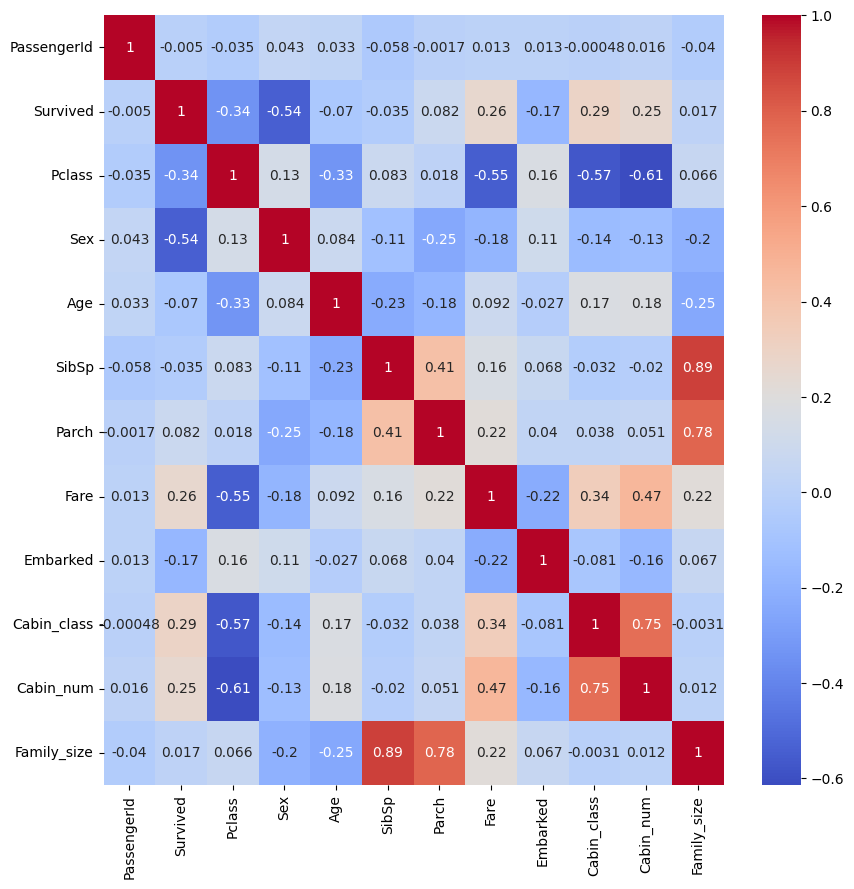

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(train_corr.corr(), annot= True , cmap='coolwarm')

In [88]:
train_corr.corr().sort_values(by= 'Survived', ascending= False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_class,Cabin_num,Family_size
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675,0.287944,0.254173,0.016639
Cabin_class,-0.000483,0.287944,-0.570691,-0.143517,0.169076,-0.031973,0.037621,0.337525,-0.080523,1.000000,0.750408,-0.003057
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719,0.337525,0.468860,0.217138
Cabin_num,0.016222,0.254173,-0.614578,-0.132017,0.177330,-0.019878,0.051112,0.468860,-0.161827,0.750408,1.000000,0.011948
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798,0.037621,0.051112,0.783111
Family_size,-0.040143,0.016639,0.065997,-0.200988,-0.248512,0.890712,0.783111,0.217138,0.066516,-0.003057,0.011948,1.000000
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128,-0.000483,0.016222,-0.040143
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230,-0.031973,-0.019878,0.890712
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749,0.169076,0.177330,-0.248512
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000,-0.080523,-0.161827,0.066516


# Feature Selection 

In [89]:
features = train[[
                  'Cabin_class',
                  'Sex',
                  'Pclass',
                  'Embarked',
                  #'Age',
                  #'SibSp',
                  'Cabin_num',
                  'Fare'
                  ]]

target = train.Survived

#age sibsip embarked 

### Get dummies 


In [90]:
features.dtypes

Cabin_class    category
Sex            category
Pclass         category
Embarked       category
Cabin_num      category
Fare            float64
dtype: object

In [91]:
encoder = OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')

In [92]:
col_dummy = ['Cabin_class', 'Pclass', 'Embarked', 'Cabin_num']

In [93]:
encoded_array = encoder.fit_transform(train[col_dummy])

In [94]:
encoded_columns = encoder.get_feature_names_out(col_dummy)

In [95]:
encoded_df = pd.DataFrame(encoded_array,columns=encoded_columns)

In [96]:
features = features.drop(columns= col_dummy)

In [97]:
features = pd.concat([features, encoded_df ], axis=1 )

In [98]:
#features = pd.get_dummies(features1, columns= ['Cabin_class', 'Pclass', 'Embarked', 'Cabin_num'] , drop_first= True)


In [99]:
features

,Sex,Fare,Cabin_class_0,Cabin_class_1,Cabin_class_2,Cabin_class_3,Cabin_class_4,Cabin_class_5,Cabin_class_6,Cabin_class_7,...,Cabin_num_92,Cabin_num_93,Cabin_num_94,Cabin_num_95,Cabin_num_96,Cabin_num_97,Cabin_num_98,Cabin_num_99,Cabin_num_100,Cabin_num_101
0,1,7.2500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,13.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,23.4500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,30.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spliting the data 


In [100]:
x_train,x_test,y_train,y_test = train_test_split(features, target , test_size=0.2 , random_state= 69 )

# Logistic regression 

In [101]:
model = LogisticRegression(random_state= 69)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8044692737430168

In [103]:
cv = cross_val_score(model, features, target)
cv_score = cv.mean()
cv_score

C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

0.7778042809616471

In [104]:
confusion = confusion_matrix(y_test, predictions)
confusion

array([[97, 15],
       [20, 47]], dtype=int64)

In [105]:
precision = precision_score(y_test, predictions)
precision

0.7580645161290323

In [106]:
performance_df = pd.DataFrame(columns= ['Model_name', 'accuracy_score', 'CV_score'])
performance_df.columns

Index(['Model_name', 'accuracy_score', 'CV_score'], dtype='object')

In [107]:
performance_df= performance_df._append({
    'Model_name': model,
    'accuracy_score': accuracy,
    'CV_score'  :   cv_score             
    } ,ignore_index = True)

C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\2153172265.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df= performance_df._append({


In [108]:
performance_df

,Model_name,accuracy_score,CV_score
0,LogisticRegression(random_state=69),0.804469,0.777804


# Gradient boster classifier

In [109]:
n_num = 100
cv_num = 5

In [110]:
#performance_df.drop(index= [1,2,3,4,5,6])

In [111]:
model = GradientBoostingClassifier(random_state= 420, n_estimators= 99 )
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110],
    'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
}

bs_GBC = BayesSearchCV(estimator = model,
                   search_spaces = grid,
                    scoring= 'accuracy',
                    n_iter = n_num,
                    cv = cv_num )

bs_GBC.fit(x_train,y_train)
bs_GBC

BayesSearchCV(cv=5,
              estimator=GradientBoostingClassifier(n_estimators=99,
                                                   random_state=420),
              n_iter=100, scoring='accuracy',
              search_spaces={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                             'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110],
                             'min_samples_split': [5, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [112]:
bs_GBC.best_params_

OrderedDict([('learning_rate', 0.01),
             ('max_depth', 90),
             ('min_samples_leaf', 5),
             ('min_samples_split', 40),
             ('n_estimators', 400)])

In [113]:
cv_score = bs_GBC.best_score_

In [114]:
predictions =  bs_GBC.best_estimator_.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

accuracy

0.8100558659217877

In [115]:
performance_df= performance_df._append({
    'Model_name': model,
    'accuracy_score': accuracy,
    'CV_score'  :   cv_score             
    } ,ignore_index = True)

performance_df

,Model_name,accuracy_score,CV_score
0,LogisticRegression(random_state=69),0.804469,0.777804
1,"GradientBoostingClassifier(n_estimators=99, ra...",0.810056,0.827263


<Axes: >

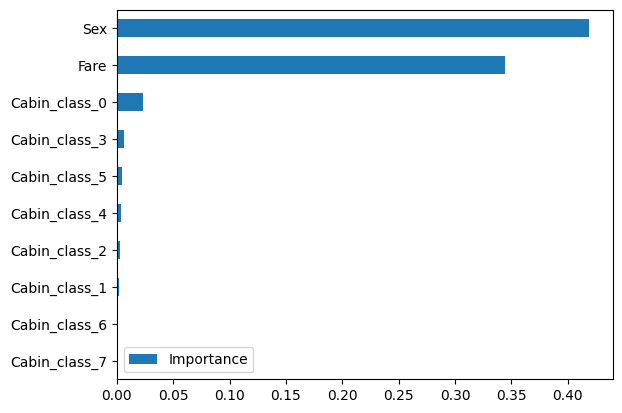

In [116]:
fi = pd.DataFrame(data = bs_GBC.best_estimator_.feature_importances_, index= bs_GBC.best_estimator_.feature_names_in_ , columns=['Importance'])
fi.head(10).sort_values(by= 'Importance' , ascending= True ).plot(kind='barh')

In [117]:

with open('GradientBoostingClassifier.pkl', 'wb') as file:
    pickle.dump(GradientBoostingClassifier, file)


In [118]:
with open('GradientBoostingClassifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

loaded_model

sklearn.ensemble._gb.GradientBoostingClassifier

# XG Boost

In [119]:
model = XGBClassifier(random_state= 420, enable_categorical = True )
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    #'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    #'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110],
    'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
}

bs_XG = BayesSearchCV(estimator = model,
                   search_spaces = grid,
                    scoring= 'accuracy',
                    n_iter = n_num,
                    cv = cv_num )

bs_XG.fit(x_train,y_train)
bs_XG

C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:160: UserWarning: [22:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:160: UserWarning: [22:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\vasan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=True, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=420, ...),
              n_iter=100, scoring='accuracy',
              search_spaces={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
                             'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110],
                             'min_samples_split': [5, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [120]:
bs_XG.best_params_

OrderedDict([('learning_rate', 0.001),
             ('max_depth', 80),
             ('min_samples_leaf', 60),
             ('min_samples_split', 100),
             ('n_estimators', 800)])

In [121]:
cv_score=  bs_XG.best_score_

In [122]:
predictions =  bs_XG.best_estimator_.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

accuracy


0.8212290502793296

In [123]:
performance_df= performance_df._append({
    'Model_name': model,
    'accuracy_score': accuracy,
    'CV_score'  :   cv_score             
    } ,ignore_index = True)

performance_df

,Model_name,accuracy_score,CV_score
0,LogisticRegression(random_state=69),0.804469,0.777804
1,"GradientBoostingClassifier(n_estimators=99, ra...",0.810056,0.827263
2,"XGBClassifier(base_score=None, booster=None, c...",0.821229,0.816084


<Axes: >

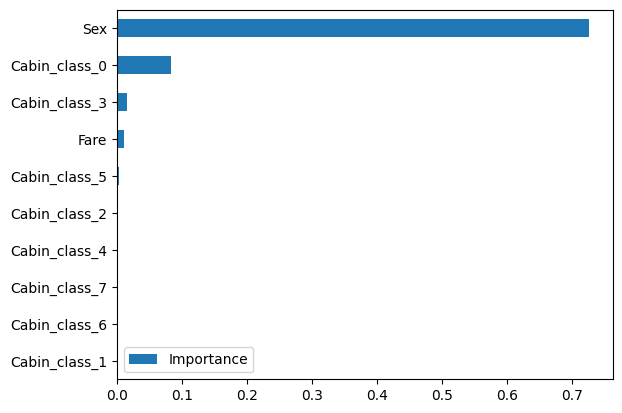

In [124]:
fi = pd.DataFrame(data = bs_XG.best_estimator_.feature_importances_, index= bs_XG.best_estimator_.feature_names_in_ , columns=['Importance'])
fi.head(10).sort_values(by= 'Importance' , ascending= True ).plot(kind='barh')

# Random Forest classifier 

In [125]:
model = RandomForestClassifier(random_state= 420 )
grid = {
    'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000],
    'max_depth':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_split':[5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100,110],
    
}

bs_RFC = BayesSearchCV(estimator = model,
                   search_spaces = grid,
                    scoring= 'accuracy',
                    n_iter = n_num,
                    cv = cv_num )

bs_RFC.fit(x_train,y_train)
bs_RFC

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=420),
              n_iter=100, scoring='accuracy',
              search_spaces={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80,
                                           90, 100],
                             'min_samples_leaf': [5, 10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110],
                             'min_samples_split': [5, 10, 20, 30, 40, 50, 60,
                                                   70, 80, 90, 100],
                             'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                                              700, 800, 900, 1000]})

In [126]:
bs_RFC.best_params_

OrderedDict([('max_depth', 30),
             ('min_samples_leaf', 5),
             ('min_samples_split', 10),
             ('n_estimators', 300)])

In [127]:
cv_score =  bs_RFC.best_score_

In [128]:
predictions =  bs_RFC.best_estimator_.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

accuracy


0.7877094972067039

In [129]:
performance_df= performance_df._append({
    'Model_name': model,
    'accuracy_score': accuracy,
    'CV_score'  :   cv_score             
    } ,ignore_index = True)

performance_df

,Model_name,accuracy_score,CV_score
0,LogisticRegression(random_state=69),0.804469,0.777804
1,"GradientBoostingClassifier(n_estimators=99, ra...",0.810056,0.827263
2,"XGBClassifier(base_score=None, booster=None, c...",0.821229,0.816084
3,RandomForestClassifier(random_state=420),0.787709,0.794947


<Axes: >

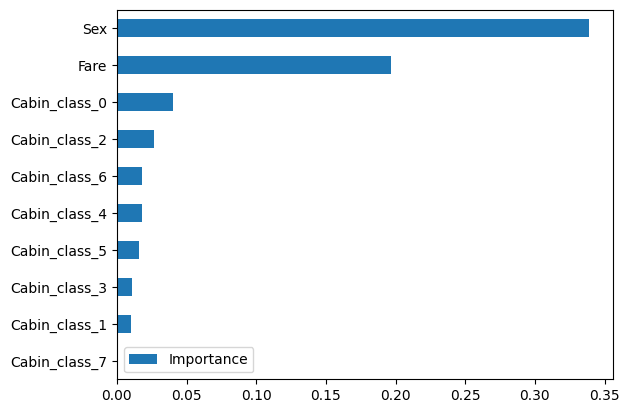

In [130]:
fi = pd.DataFrame(data = bs_RFC.best_estimator_.feature_importances_, index= bs_RFC.best_estimator_.feature_names_in_ , columns=['Importance'])
fi.head(10).sort_values(by= 'Importance' , ascending= True ).plot(kind='barh')

# Predicting 


In [131]:
test = pd.read_csv(r"C:\Users\vasan\OneDrive\Documents\python_files\Training_camp\Source_files\titanic\test.csv")
test.info()
test.duplicated().sum()
# Pre processing 

### Spliting columns
test['Cabin_class'] = test['Cabin'].str[0]
test['Cabin_num'] = test['Cabin'].str[1:].str.strip()
# Adding columns 
test['Family_size'] = test.SibSp + test.Parch
### Dropping cabin

test.drop(columns='Cabin', inplace= True)
### Null values 

test['Age'].skew()
test['Age'].fillna(test['Age'].mean(), inplace= True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace= True)
test['Cabin_class'].fillna(0,inplace=True)
test['Cabin_num'].fillna(0,inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\2676426813.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(), inplace= True)
C:\Users\vasan\AppData\Local\Temp\ipykernel_14952\2676426813.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_class    0
Cabin_num      0
Family_size    0
dtype: int64

In [132]:

### Convert to categorical 

#test['Survived'] = pd.Categorical(test['Survived'])
test['Pclass'] = pd.Categorical(test['Pclass'])
test['Sex'] = pd.Categorical(test['Sex'])
test['Embarked'] = pd.Categorical(test['Embarked'])
test['PassengerId'] = pd.Categorical(test['PassengerId'])
test['Cabin_class'] = pd.Categorical(test['Cabin_class'] )
test['Cabin_num'] = pd.Categorical(test['Cabin_num'] )



test.dtypes
# Striping objects (removing spaces start and end) 
test['Ticket'] = test['Ticket'].str.strip()

test['Name'] = test['Name'].str.strip()

### Cat coding 
test['Sex'] = test['Sex'].cat.codes
test['Sex'] = pd.Categorical(test['Sex'])

test['Pclass'] = test['Pclass'].cat.codes
test['Pclass'] = pd.Categorical(test['Pclass'])

test['Embarked'] = test['Embarked'].cat.codes
test['Embarked'] = pd.Categorical(test['Embarked'])

test['PassengerId'] = test['PassengerId'].cat.codes
test['PassengerId'] = pd.Categorical(test['PassengerId'])

test['Cabin_class'] = test['Cabin_class'].cat.codes
test['Cabin_class'] = pd.Categorical(test['Cabin_class'])

test['Cabin_num'] = test['Cabin_num'].cat.codes
test['Cabin_num'] = pd.Categorical(test['Cabin_num'])




test.info()
# Corelation graph

test.columns

'''test_corr = test[[
                'PassengerId',
                'Survived', 
               'Pclass', 
               #'Name', 
               'Sex', 
               'Age', 
               'SibSp',
               'Parch', 
               #'Ticket', 
               'Fare', 
               'Embarked', 
               'Cabin_class', 
               'Cabin_num',
               'Family_size'
               ]]

test_corr.corr().sort_values(by='Survived', ascending= False)
plt.figure(figsize=(10,10))
sns.heatmap(test_corr.corr(), annot= True , cmap='coolwarm')
test_corr.corr().sort_values(by= 'Survived', ascending= False)'''

# Feature Selection 
features2 = test[[
                  'Cabin_class',
                  'Sex',
                  'Pclass',
                  'Embarked',
                  #'Age',
                  #'SibSp',
                  'Cabin_num',
                  'Fare'
                  ]]



#age sibsip embarked 
### Get dummies 

features2.dtypes
#encoder = OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')
col_dummy = ['Cabin_class', 'Pclass', 'Embarked', 'Cabin_num']
encoded_array = encoder.transform(test[col_dummy])
encoded_columns = encoder.get_feature_names_out(col_dummy)
encoded_df = pd.DataFrame(encoded_array,columns=encoded_columns)
features2 = features2.drop(columns= col_dummy)
features2 = pd.concat([features2, encoded_df ], axis=1 )
#features2 = pd.get_dummies(features21, columns= ['Cabin_class', 'Pclass', 'Embarked', 'Cabin_num'] , drop_first= True)

features2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    category
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
 10  Cabin_class  418 non-null    category
 11  Cabin_num    418 non-null    category
 12  Family_size  418 non-null    int64   
dtypes: category(6), float64(2), int64(3), object(2)
memory usage: 38.5+ KB


,Sex,Fare,Cabin_class_0,Cabin_class_1,Cabin_class_2,Cabin_class_3,Cabin_class_4,Cabin_class_5,Cabin_class_6,Cabin_class_7,...,Cabin_num_92,Cabin_num_93,Cabin_num_94,Cabin_num_95,Cabin_num_96,Cabin_num_97,Cabin_num_98,Cabin_num_99,Cabin_num_100,Cabin_num_101
0,1,7.8292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9.6875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,8.6625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0,108.9000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1,7.2500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:


predictingGB = bs_GBC.best_estimator_.predict(features2)
predictingRfc = bs_RFC.best_estimator_.predict(features2)
predictingXg = bs_XG.best_estimator_.predict(features2)


predictions_df = pd.DataFrame({
    'GradientBoosting': predictingGB,
    'RandomForest': predictingRfc,
    'XGBoost': predictingXg
})


print(predictions_df)

predictions_df.to_excel('prediction_titanic.xlsx' , index= False)

     GradientBoosting  RandomForest  XGBoost
0                   0             0        0
1                   1             0        0
2                   0             0        0
3                   0             0        0
4                   1             1        1
..                ...           ...      ...
413                 0             0        0
414                 1             1        1
415                 0             0        0
416                 0             0        0
417                 0             0        0

[418 rows x 3 columns]


In [134]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(bs_XG, file)

with open('GBC_model.pkl', 'wb') as file:
    pickle.dump(bs_GBC, file)

with open('RFC_model.pkl', 'wb') as file:
    pickle.dump(bs_RFC, file)